# Project 7: Gold price prediction using Machine Learning with Python

Surendra Prajapat


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# DataSet Link : https://bit.ly/3ZL8WfO
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Correlation:
  1. Positive Correlation
  2. Negative Correlation

In [16]:
correlation = gold_data.corr()

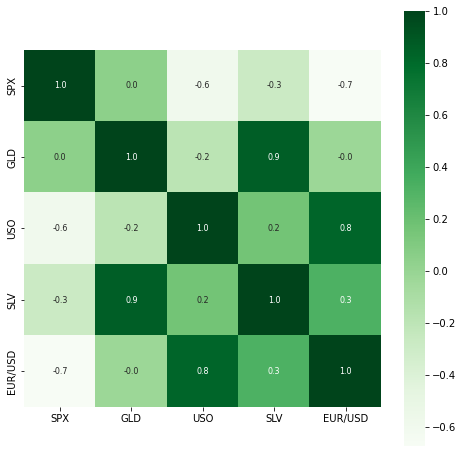

In [20]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [22]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


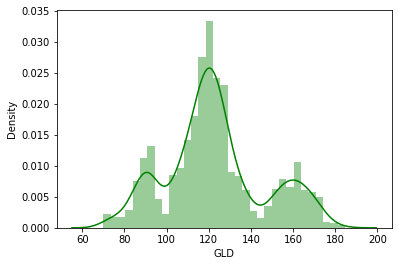

In [26]:
sns.distplot(gold_data['GLD'], color='Green')

In [28]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [29]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [30]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training Random Forest Regressor

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluate

In [35]:
test_data_prediction = regressor.predict(x_test)

In [36]:
print(test_data_prediction)

[168.39509935  82.17909964 115.86370009 127.64480047 120.69710124
 154.71999813 150.32099845 125.97560051 117.66719871 125.95560129
 116.67840097 171.91510085 141.95459844 167.9531992  115.26659998
 117.8373003  139.65660277 170.05480108 160.24270301 160.24389944
 155.17590024 125.05540011 175.78299887 157.13040406 125.17650037
  93.84289961  77.67380036 121.18150005 119.09339927 167.45029903
  88.24930054 125.19860005  91.18670052 117.66070029 121.04389879
 135.7838004  115.83380132 114.82270076 146.98279968 107.4295006
 103.97460233  87.23069782 126.51980041 118.10960046 154.85329911
 119.79489996 108.38089959 108.16879807  93.1832005  127.24599711
  75.22130027 113.56789874 121.19269988 111.32329889 118.79029885
 120.42269948 159.39210035 169.07570115 146.95529708  85.8860988
  94.47800029  86.79369847  90.62060034 118.77370098 126.41020087
 127.59830014 167.85829993 122.27739969 117.37519895  99.03010057
 167.53560078 143.32619849 131.49580246 121.17450219 120.98539941
 119.7379006

In [37]:
# R sqaure error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [38]:
print("R sqaure error: ", error_score)

R sqaure error:  0.9894335266831905


Comapare the Actual Values and Predicted Values in a Plot

In [39]:
y_test = list(y_test)

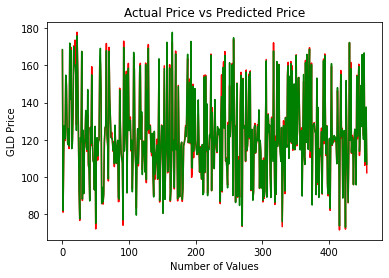

In [42]:
plt.plot(y_test, color='red', label="Actual Value")
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.show()